In [1]:
import os
import pandas as pd
import numpy as np
from nilearn.connectome import ConnectivityMeasure
import matplotlib.pyplot as plt

## Code from Jakevdp

In [14]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    fig = plt.figure()
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)
    fig.set_size_inches(10, 5)

In [3]:
def extract_data():
    data = []
    for f in os.listdir("PCA_results/"):
        if not f.startswith(".") and f.startswith("sub"):
            data.append(pd.read_csv(os.path.join("PCA_results", f)).values)
    return np.stack(data)

In [4]:
data = extract_data()

In [5]:
data.shape

(28, 369, 6)

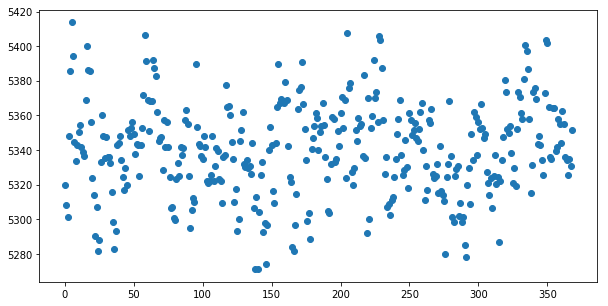

In [6]:
fig = plt.figure()
plt.scatter(np.arange(len(data[0, :, 0])), data[0, :, 0])
fig.set_size_inches(10, 5)

In [7]:
subj_one = data[0, :, :]

In [114]:
def time_diff(data):
    for i in range(1,29):
        subj_data = data[i]
        visual = np.array(list(zip(np.arange(len(subj_data[:, 3])), subj_data[:, 3])))
        events_df = pd.read_csv("ds000164_R1.0.1/sub-00{}/func/sub-00{}_task-stroop_events.tsv".format(i, i), delimiter='\t')
        recorded_events = events_df.onset / 1.5 
        gmm = GaussianMixture(n_components=len(recorded_events), covariance_type='spherical')
        gmm.fit(visual)
        visual_events = np.sort(gmm.means_[:, 0])
        print(np.abs(recorded_events - visual_events).mean())

In [ ]:
time_diff(data)

In [64]:
visual = np.array(list(zip(np.arange(len(subj_one[:, 0])), subj_one[:, 0])))
motor = np.array(list(zip(np.arange(len(subj_one[:, -1])), subj_one[:, -1])))

In [65]:
from sklearn.mixture import GaussianMixture

In [106]:
# leave one out:
# 
visual_data = data[:, :, 0]
likelihood = np.zeros(len(data) * 30).reshape(len(data), 30)
for i in range(len(data)):
    previous = 0
    for j in range(10, 310, 10):
        gmm = GaussianMixture(n_components=j, covariance_type='spherical')
        gmm.fit(visual_data[i].reshape(-1, 1))
        new = gmm.score(visual_data[i].reshape(-1, 1))
        likelihood[i, int(j / 10) - 1] = new - previous
        previous = new
    print("###")

###
###
###
###
###
###
###
###
###
###
###
###
###
###
###
###
###
###
###
###
###
###
###
###
###
###
###
###


In [107]:
np.argmax(likelihood, axis=1)

array([23, 13, 20, 27, 20, 10, 20, 15, 18, 19, 26, 22, 17, 14, 16, 21, 19,
       22, 17,  4, 20, 25, 18, 20, 16, 21, 15, 20])

In [109]:
np.mean(likelihood, axis=0).argmax()

20

In [111]:
motor_data = data[:, :, 3]
likelihood = np.zeros(len(data) * 30).reshape(len(data), 30)
for i in range(len(data)):
    previous = 0
    for j in range(10, 310, 10):
        gmm = GaussianMixture(n_components=j, covariance_type='spherical')
        gmm.fit(motor_data[i].reshape(-1, 1))
        new = gmm.score(motor_data[i].reshape(-1, 1))
        likelihood[i, int(j / 10) - 1] = new - previous
        previous = new
    print("###")

###
###
###
###
###
###
###
###
###
###
###
###
###
###
###
###
###
###
###
###
###
###
###
###
###
###
###
###


In [116]:
np.mean(likelihood, axis=0)

array([-4.915283  ,  0.05966713,  0.05713711,  0.06796558,  0.08102188,
        0.0791002 ,  0.1011645 ,  0.09511196,  0.10827718,  0.09928842,
        0.12027392,  0.12587975,  0.14731594,  0.15642593,  0.14384561,
        0.15253866,  0.16124799,  0.16314572,  0.1805994 ,  0.18487861,
        0.18081457,  0.188733  ,  0.18577866,  0.18688714,  0.19007944,
        0.18901355,  0.17756611,  0.18619169,  0.17296288,  0.17524762])

In [117]:
np.mean(likelihood, axis=0).argmax()

24

In [110]:
gmm = GaussianMixture(n_components=120, covariance_type='spherical')

In [67]:
gmm.fit(visual)

GaussianMixture(covariance_type='spherical', init_params='kmeans',
        max_iter=100, means_init=None, n_components=120, n_init=1,
        precisions_init=None, random_state=None, reg_covar=1e-06,
        tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
        weights_init=None)

In [68]:
visual_events = np.sort(gmm.means_[:, 0])

In [70]:
gmm.fit(motor)
motor_events = np.sort(gmm.means_[:, 0])

In [74]:
motor_events.sort()
visual_events.sort()
motor_events - visual_events

array([ 0.49221911,  0.5       , -2.49894569,  0.30686845, -0.17794336,
        0.29015773,  1.02028957,  2.49982488,  1.05093187,  6.00592423,
        8.99758927,  3.019351  ,  8.52237256, 11.1387913 ,  5.14724085,
        7.44034962,  1.51270259,  0.4936201 , -3.33317214, -1.77581936,
        2.2701904 ,  0.97360198,  6.10220277, -0.94308061,  1.50007239,
        5.58196635,  0.58196174,  5.41703113,  4.99563801,  6.73447295,
        5.63820795,  9.        ,  5.36959445,  0.67900176,  3.5399793 ,
        0.70579051,  1.29898938,  0.8577453 ,  6.09564276, 10.46544385,
        9.16766386, 12.03937241, 11.95024451,  8.73777167,  9.99903242,
        9.33222734, 15.50693515, 15.86696804, 16.8273543 , 20.17616827,
       20.36532685, 21.64727153, 20.00165848, 22.8999952 , 18.49999981,
       24.00054671, 23.80190003, 28.16811977, 28.33319604, 25.        ,
       27.53782411, 24.61407012, 32.02075163, 25.12040969, 25.0877876 ,
       22.2820714 , 20.00018919, 20.19692647, 20.23172239, 18.65

In [75]:
motor_events

array([  1.5       ,   5.5       ,   5.5       ,   8.32369833,
         8.49999987,  12.00033111,  16.02028957,  19.99999008,
        21.05093187,  28.00087414,  32.00002575,  32.01944785,
        38.34305597,  41.32339439,  44.14755532,  48.        ,
        48.10072896,  48.49983256,  50.        ,  56.22418064,
        60.77967275,  61.47361665,  69.60220171,  70.05632211,
        72.5000415 ,  78.55273165,  79.07560195,  88.75058092,
        89.99512591,  96.27067488,  97.99664954, 104.        ,
       106.24055879, 107.94614522, 112.5399793 , 114.        ,
       118.29898938, 121.14966466, 127.59866355, 132.46544385,
       134.49998614, 137.53716203, 144.4113138 , 144.73777167,
       149.        , 150.66556068, 157.65016085, 161.20030226,
       168.32727159, 172.53293326, 177.86544677, 179.14819218,
       185.        , 188.39999617, 189.        , 195.00026545,
       195.80190003, 201.49998022, 202.33319604, 203.        ,
       207.0000017 , 208.94422565, 216.49994584, 216.62

In [51]:
import pandas as pd

In [52]:
events_df = pd.read_csv("ds000164_R1.0.1/sub-001/func/sub-001_task-stroop_events.tsv", delimiter='\t')

In [53]:
recorded_events = events_df.onset / 1.5 

In [54]:
visual_events

array([  1.01404566,   5.        ,   8.04092223,   8.67794323,
        11.4218528 ,  15.        ,  17.5001652 ,  23.00183385,
        23.66673575,  24.53034346,  29.00009851,  30.19293243,
        36.        ,  36.00099406,  38.99522119,  43.72970396,
        46.5495362 ,  49.35112865,  53.33524593,  57.        ,
        58.        ,  61.6666644 ,  63.5       ,  69.3767629 ,
        70.95351103,  78.49649131,  80.55191037,  85.0003708 ,
        88.9653507 ,  91.44146099,  93.49921617,  95.        ,
        99.50166702, 100.54747746, 107.32596113, 114.42039827,
       117.        , 120.30257066, 121.48575591, 125.49781512,
       128.60724901, 134.92353326, 139.0009658 , 141.33333333,
       145.33333418, 151.49991633, 152.20461953, 155.        ,
       157.48203423, 164.99568328, 165.50024984, 166.94488888,
       170.99428766, 172.        , 174.4903492 , 179.42724819,
       182.43206669, 187.        , 190.        , 191.50000525,
       194.80204505, 196.34643444, 200.00103575, 201.99

In [55]:
recorded_events

0        0.228000
1        2.230000
2        8.230667
3       10.232667
4       12.233333
5       14.234000
6       16.234667
7       18.235333
8       21.236000
9       23.236667
10      29.237333
11      31.239333
12      33.240000
13      35.240667
14      37.241333
15      39.242000
16      44.242667
17      46.244667
18      54.245333
19      56.248000
20      60.248667
21      63.250000
22      66.250667
23      71.252000
24      75.253333
25      79.254667
26      81.256667
27      84.257333
28      94.258000
29      96.261333
          ...    
90     283.324667
91     285.325333
92     289.326000
93     291.327333
94     293.328000
95     295.328667
96     299.329333
97     301.330667
98     305.331333
99     307.332667
100    309.333333
101    311.334000
102    313.334667
103    315.335333
104    317.336000
105    319.336667
106    321.337333
107    324.338000
108    326.339333
109    328.340000
110    330.340667
111    332.341333
112    336.342000
113    339.343333
114    341

In [56]:
(np.abs(recorded_events[:] - visual_events[:])).mean()

4.057570679547968

In [57]:
gmm.covariances_

array([7.25489964e+00, 4.58638411e+00, 3.22128059e+00, 3.23725258e+00,
       3.74942616e+00, 1.38319115e+01, 3.71324469e+00, 1.81434239e+01,
       2.81725484e+00, 1.26723335e+01, 1.30450285e+01, 2.34463432e+01,
       1.03352764e-06, 7.56922848e+00, 6.57358818e+00, 1.02552449e+01,
       8.19413230e-01, 7.36639568e+00, 1.13269634e+01, 6.78831606e+00,
       1.53069794e+00, 1.31051113e+00, 1.52438285e+00, 4.18878862e+00,
       1.16455530e+01, 7.98922830e+00, 2.52480182e+01, 7.93688574e-01,
       1.77583782e+01, 1.16485510e+01, 1.50969361e+01, 1.02797606e-06,
       2.49266516e+01, 1.03074032e+00, 1.30860570e-01, 4.82074280e+00,
       8.14315414e+00, 1.41873157e+01, 3.88380315e+00, 8.32108593e+00,
       2.49061309e+01, 2.47522102e+00, 1.08941649e+01, 3.00835943e+01,
       6.59172869e+00, 4.89955890e+00, 1.59071568e+01, 5.85816419e+00,
       9.24467989e+00, 2.86953420e+00, 3.64641905e+00, 1.70079190e+01,
       8.42996417e+00, 1.44983596e+01, 3.40833189e+01, 9.01287498e+00,
      

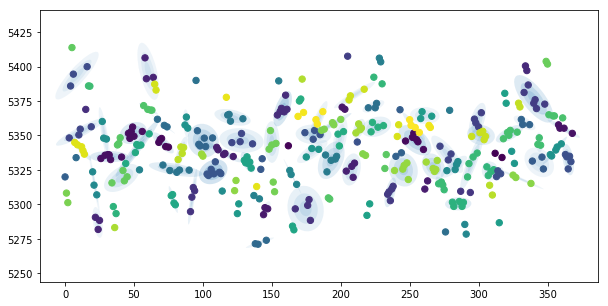

In [15]:
plot_gmm(gmm, visual)

In [58]:
gmm.fit(visual)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=120, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

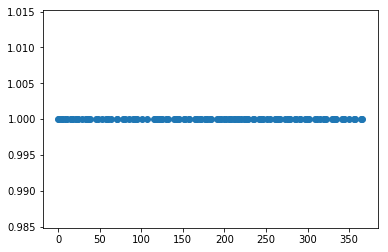

In [63]:
plt.scatter(gmm.means_[:, 0], np.ones(len(gmm.means_)))

In [ ]:
visual_events = np.

IndexError: index 1 is out of bounds for axis 1 with size 1

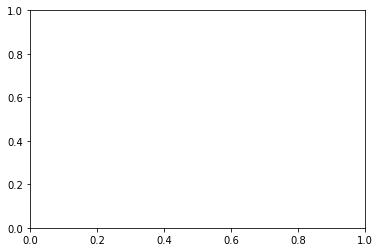

In [18]:
plot_gmm(gmm, subj_one[:, 0].reshape(-1, 1), label=False)